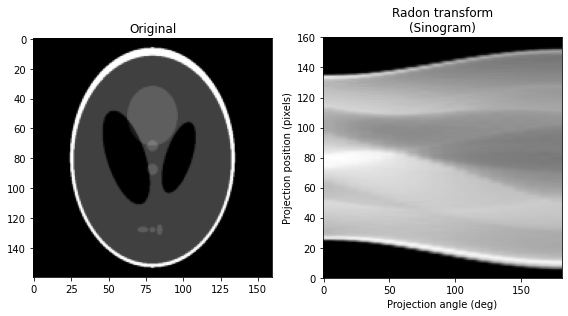

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = shepp_logan_phantom()
image = rescale(image, scale=0.4, mode='reflect')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

ntheta = 20
theta = np.linspace(0., 180/2, ntheta, endpoint=False) # 22 angles
sinogram = radon(image, theta=theta) # TODO: set 512 lines / angle

dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

In [29]:
image.shape

(160, 160)

In [30]:
max(image.shape), len(theta)

(160, 20)

FBP rms reconstruction error: 0.182


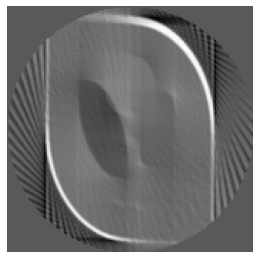

In [34]:
from skimage.transform import iradon

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')
error = reconstruction_fbp - image
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, ax = plt.subplots(1, figsize=(10, 4), sharex=True, sharey=True)
fig.tight_layout()
plt.axis('off')
ax.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
plt.savefig('FBP.png', facecolor="white", transparent=True, dpi=200, bbox_inches='tight')